In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualizations style
sns.set(style="whitegrid")

In [6]:
# Load the dataset
df = pd.read_csv('Cardiotocographic.csv')

# Display the first few rows
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [8]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64


In [10]:
# Handle missing values by filling with median values
df.fillna(df.median(), inplace=True)

In [12]:
# Detect outliers using the IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define outlier limits
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = ((df < lower_bound) | (df > upper_bound)).sum()
print("Outliers in each column:\n", outliers)

Outliers in each column:
 LB           10
AC           43
FM          347
UC           13
DL          125
DS          120
DP          284
ASTV         10
MSTV         80
ALTV        318
MLTV         81
Width        10
Tendency     10
NSP         559
dtype: int64


In [14]:
# Statistical summary of the dataset
stat_summary = df.describe()
print("Statistical Summary:\n", stat_summary)

Statistical Summary:
                 LB           AC           FM           UC           DL  \
count  2126.000000  2126.000000  2126.000000  2126.000000  2126.000000   
mean    133.340204     0.003204     0.009894     0.004391     0.001895   
std      11.214379     0.004373     0.067540     0.003340     0.003343   
min      51.842487    -0.019284    -0.480634    -0.014925    -0.015393   
25%     126.000000     0.000000     0.000000     0.001851     0.000000   
50%     133.000000     0.001634     0.000000     0.004484     0.000000   
75%     140.000000     0.005606     0.002567     0.006536     0.003289   
max     214.000000     0.038567     0.961268     0.030002     0.030769   

                DS           DP         ASTV         MSTV         ALTV  \
count  2126.000000  2126.000000  2126.000000  2126.000000  2126.000000   
mean      0.000002     0.000173    46.995984     1.364378    10.285964   
std       0.000141     0.000836    18.813973     1.173632    21.205041   
min      -0.001

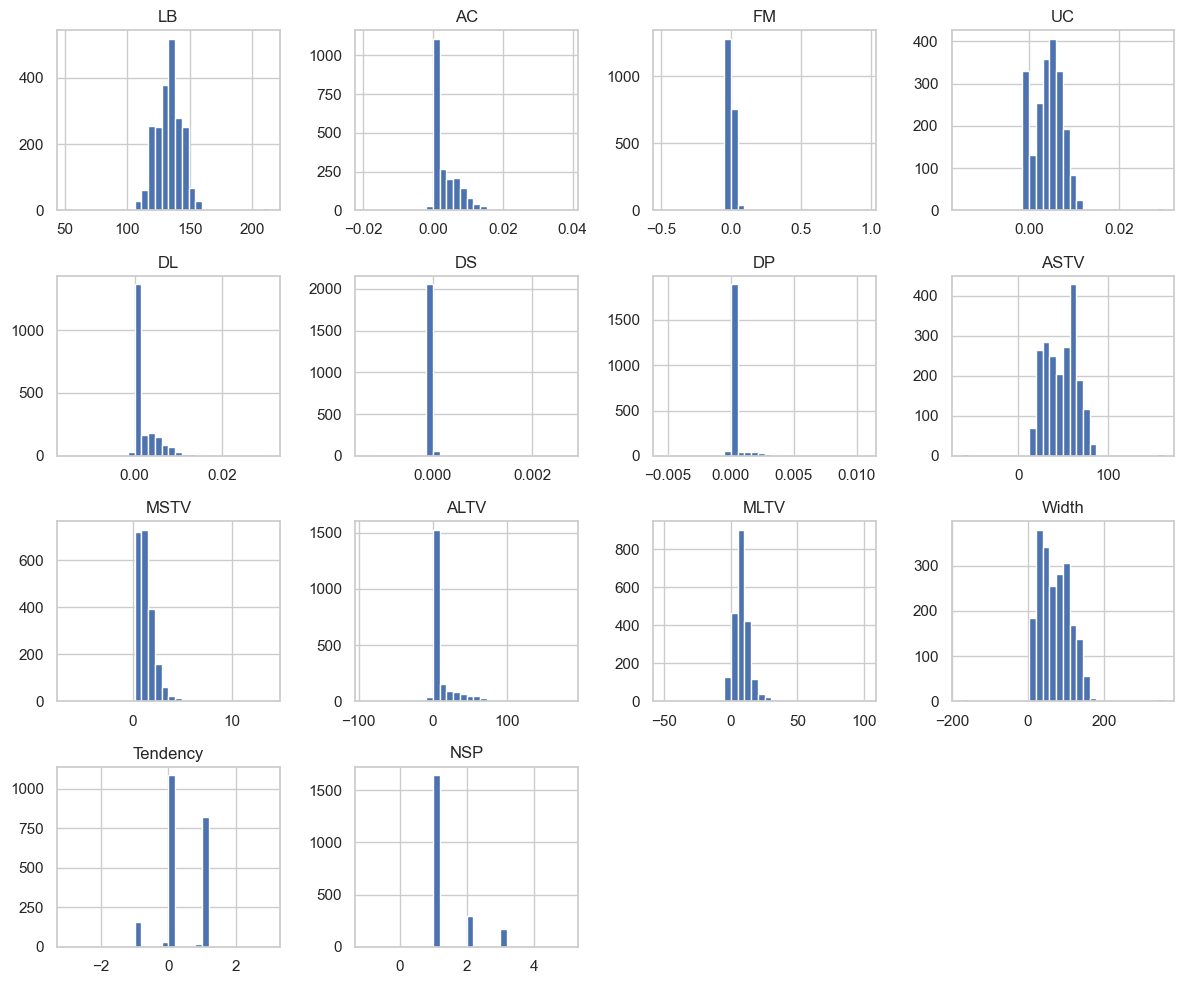

In [16]:
# Plot histograms for each variable
df.hist(figsize=(12, 10), bins=30)
plt.tight_layout()
plt.show()

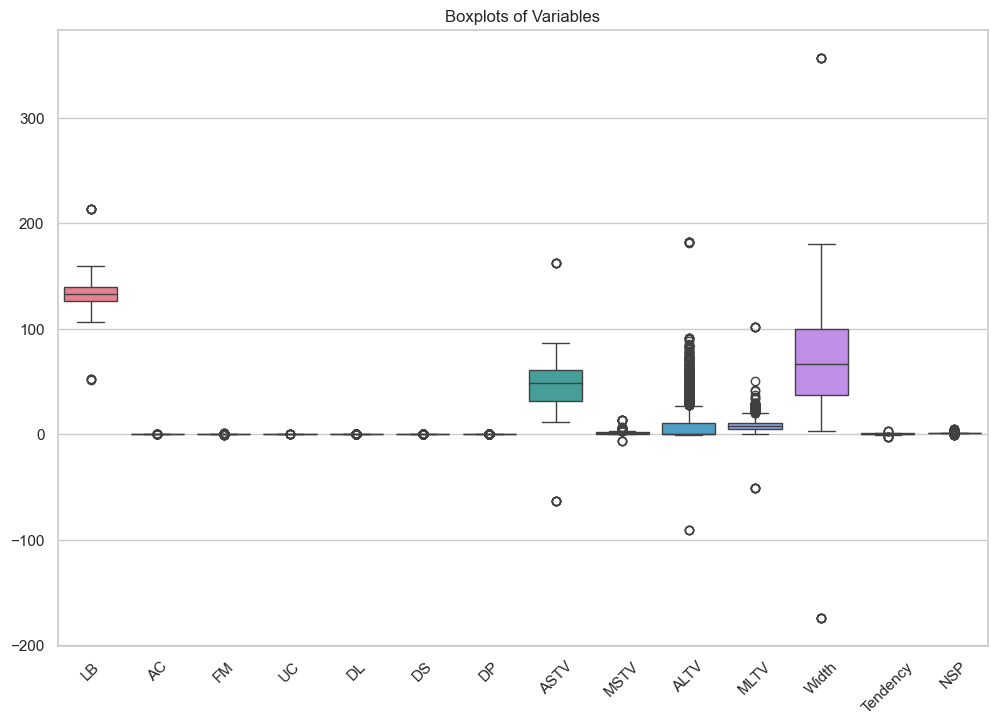

In [18]:
# Plot boxplots for each variable to visualize outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title("Boxplots of Variables")
plt.show()

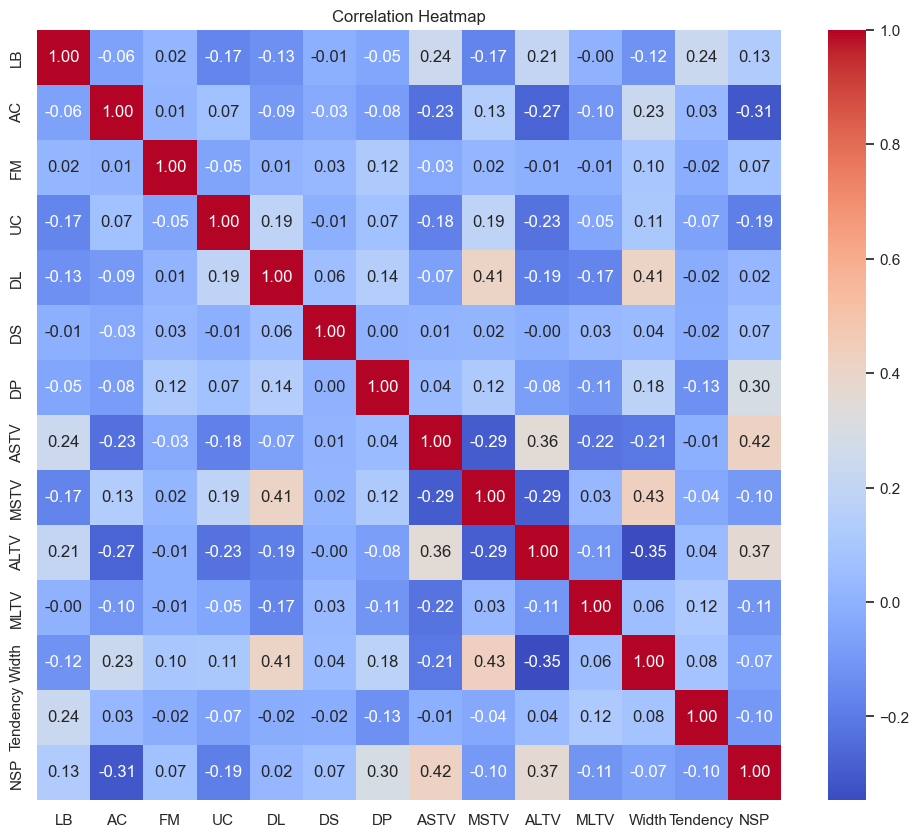

In [20]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

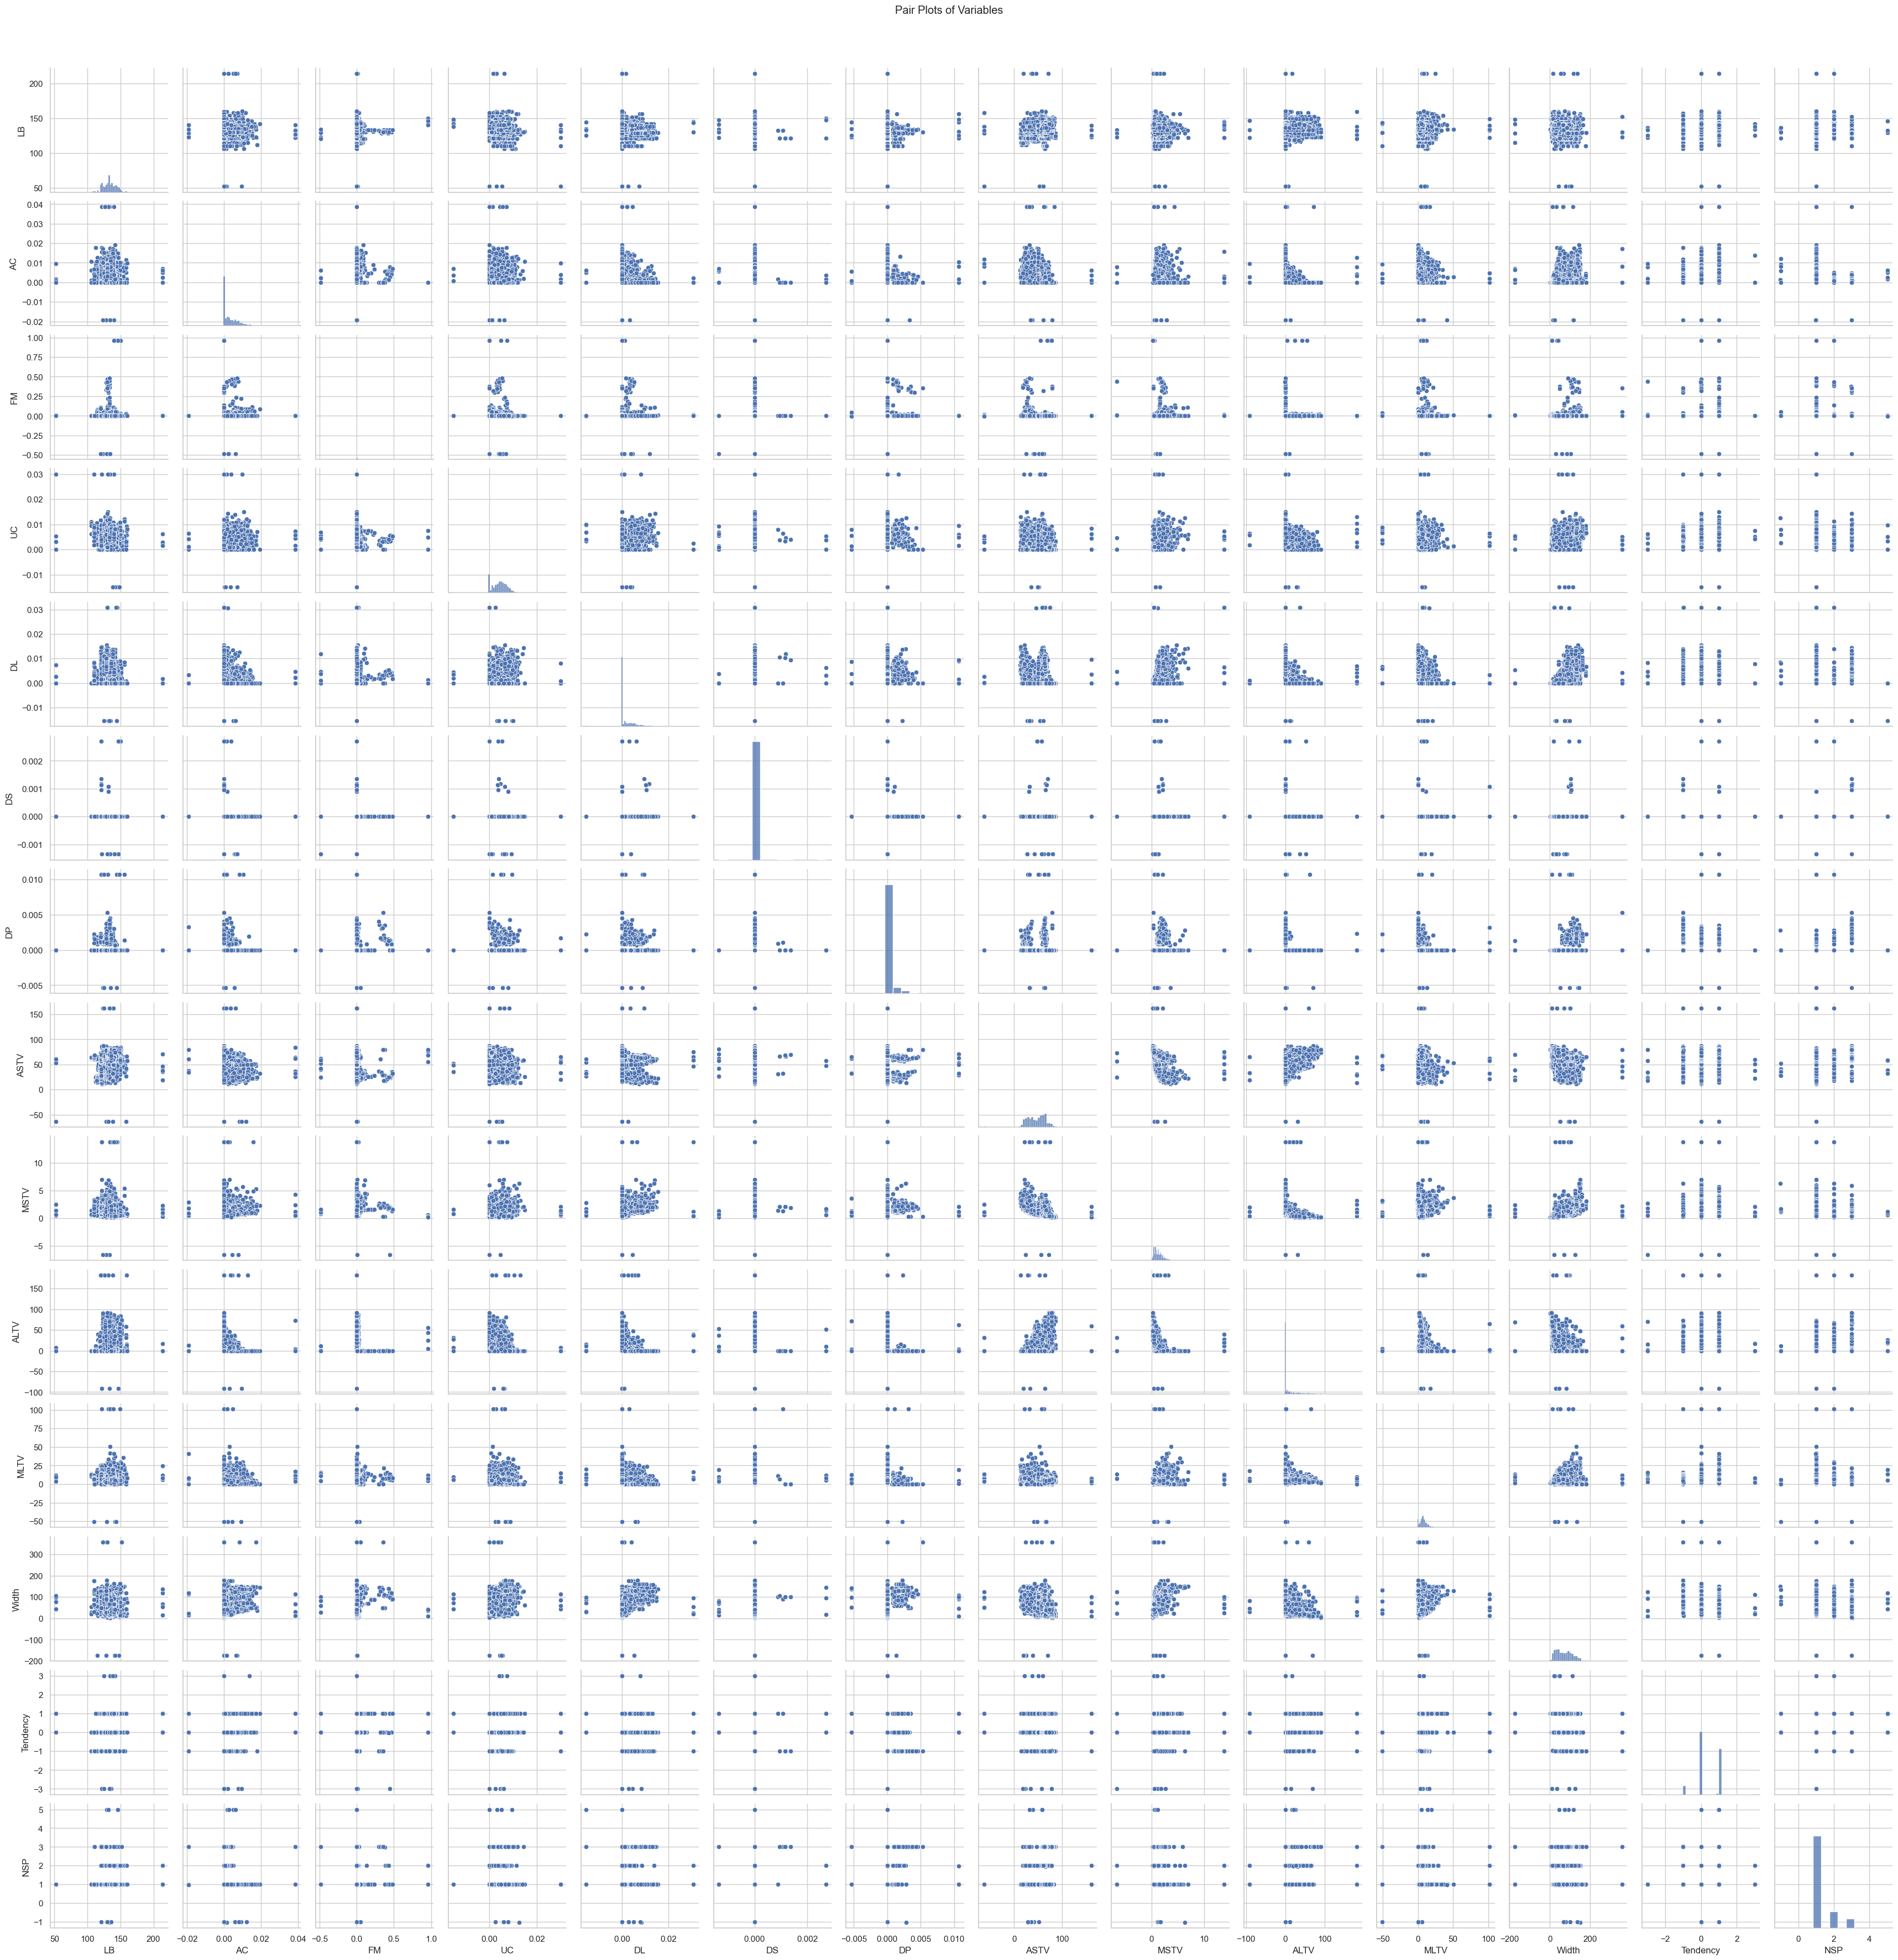

In [22]:
# Pair plots to show relationships between variables
sns.pairplot(df)
plt.suptitle("Pair Plots of Variables", y=1.02)
plt.show()

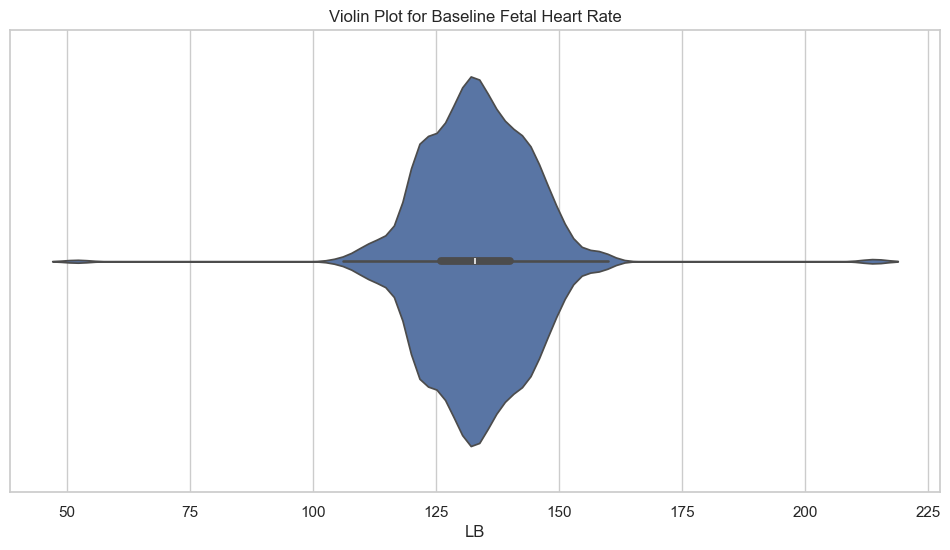

In [26]:
# Violin plot for variable 'LB' (example)
plt.figure(figsize=(12, 6))
sns.violinplot(x='LB', data=df)
plt.title("Violin Plot for Baseline Fetal Heart Rate")
plt.show()

In [28]:
# Display correlations
correlations = df.corr()
print("Correlations:\n", correlations)

Correlations:
                 LB        AC        FM        UC        DL        DS  \
LB        1.000000 -0.062813  0.018807 -0.166229 -0.126563 -0.005432   
AC       -0.062813  1.000000  0.009768  0.071621 -0.093449 -0.033088   
FM        0.018807  0.009768  1.000000 -0.053226  0.009718  0.029916   
UC       -0.166229  0.071621 -0.053226  1.000000  0.190128 -0.006938   
DL       -0.126563 -0.093449  0.009718  0.190128  1.000000  0.058413   
DS       -0.005432 -0.033088  0.029916 -0.006938  0.058413  1.000000   
DP       -0.047650 -0.083298  0.121459  0.070295  0.144717  0.004321   
ASTV      0.241857 -0.230470 -0.032691 -0.181161 -0.069361  0.008426   
MSTV     -0.169647  0.132962  0.017055  0.189406  0.410102  0.016026   
ALTV      0.210542 -0.269807 -0.011936 -0.227304 -0.186967 -0.004335   
MLTV     -0.003423 -0.104853 -0.006121 -0.049452 -0.165293  0.034367   
Width    -0.118397  0.234549  0.097282  0.107083  0.408578  0.040845   
Tendency  0.236730  0.031710 -0.017819 -0.066832 